In [1]:
import pandas as pd
import os

## Code to get data from one file

In [2]:
def extract_data(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 


In [3]:
def extract_data_2(filepath): 
#Extract the data from a single simulation output 
    # print(filepath)
    data=pd.read_excel(filepath, skiprows=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], index_col=0) #skip the first 3 rows of the file, set the first column as the index column
     

    # drop first three columns 
    # these are the empty "format" column, the units column, and the initial configuration, which we don't care about
    # (remember the original first column is the index column now, so it doesn't get dropped)
    data.drop(data.columns[0:3], axis=1, inplace=True) 
    
    data = data.transpose() #transpose the data so that the columns are the variables and the rows are the data points
    return data 

## Code to loop over folder and concatenate data (untested)

In [30]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 30%/Configs and results 2 30%/results 2 30%/new filetype" #path to the folder containing the files
filenames = os.listdir(filepath)
all_data = [] #list to store the data from all the files
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data = extract_data(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name
        all_data.append(data) #append the data to the list of all data
all_data = pd.concat(all_data, axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data



Loading file: 1001-2000 2 30% new.xlsx
Loading file: 2001-3000 2 30% new.xlsx
Loading file: 3001-4000 2 30% new.xlsx
Loading file: 4001-5000 2 30% new.xlsx


,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126,21.04,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730,25.51,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425,24.84,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486,22.76,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325,25.12,93.57
...,...,...,...,...,...,...,...,...,...,...
3999,57.82514,23.72746,48.17943,44.96533,16.15271,14.67983,15.69500,-2.343,25.96,76.55
4000,31.70644,40.66130,39.15084,34.52286,17.14512,15.52482,24.71420,-2.190,23.30,89.95
4001,42.75364,38.62500,45.55592,37.52035,15.80579,14.68691,18.05290,-2.238,23.80,84.06
4002,29.12727,43.91183,26.55352,28.04726,14.68081,19.16128,31.45083,-2.181,22.43,94.83


In [31]:
filepath = "C:/Users/ankur/OneDrive/Documents/Solidworks Config generations and Results 30%/Configs and results 2 30%/results 2 30%" #path to the folder containing the files
filenames = os.listdir(filepath)
for f in filenames:
    if f.endswith(".xlsx"):
        print(f"Loading file: {f}")
        data2 = extract_data_2(f"{filepath}/{f}") #format the exact path using the folder path + / + the file name

data2.index = range(len(data2)) #rename indices to avoid issues with duplicates
data2


Loading file: 1-1000 2 30% new.xlsx


,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,24.491,25.006,40.098,48.642,17.364,28.583,19.487,-2.235,20.86,87.86
1,46.517,40.561,46.414,29.929,15.165,14.735,17.321,-2.234,24.15,84.80
2,60.395,37.660,32.578,32.534,16.704,15.820,25.363,-2.232,26.18,82.56
3,23.707,47.396,42.834,46.807,15.066,19.449,15.389,-2.394,22.93,84.13
4,49.251,55.232,44.403,35.188,11.330,21.026,20.971,-2.380,24.13,79.06
...,...,...,...,...,...,...,...,...,...,...
997,49.047,37.688,49.817,41.180,10.437,15.375,20.170,-2.449,24.38,79.12
998,56.645,52.973,40.194,30.472,11.161,11.776,25.684,-2.459,26.12,79.54
999,36.845,36.266,42.681,45.959,10.230,25.635,20.098,-2.322,22.71,83.52
1000,45.694,32.769,37.213,34.407,13.690,28.109,19.403,-2.097,23.17,87.58


In [32]:
data2 = data2.drop([1001])
data2

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,24.491,25.006,40.098,48.642,17.364,28.583,19.487,-2.235,20.86,87.86
1,46.517,40.561,46.414,29.929,15.165,14.735,17.321,-2.234,24.15,84.80
2,60.395,37.660,32.578,32.534,16.704,15.820,25.363,-2.232,26.18,82.56
3,23.707,47.396,42.834,46.807,15.066,19.449,15.389,-2.394,22.93,84.13
4,49.251,55.232,44.403,35.188,11.330,21.026,20.971,-2.380,24.13,79.06
...,...,...,...,...,...,...,...,...,...,...
996,64.840,38.633,32.655,40.408,13.363,14.928,17.551,-2.365,30.06,77.29
997,49.047,37.688,49.817,41.180,10.437,15.375,20.170,-2.449,24.38,79.12
998,56.645,52.973,40.194,30.472,11.161,11.776,25.684,-2.459,26.12,79.54
999,36.845,36.266,42.681,45.959,10.230,25.635,20.098,-2.322,22.71,83.52


In [33]:
all_data = pd.concat([all_data, data2], axis = 0) #concatenate all the data into a single dataframe

all_data.index = range(len(all_data)) #rename indices to avoid issues with duplicates
all_data

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4,Stress4,Mass3
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126,21.04,93.38
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730,25.51,82.86
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425,24.84,75.54
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486,22.76,84.62
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325,25.12,93.57
...,...,...,...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100,-2.365,30.06,77.29
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000,-2.449,24.38,79.12
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400,-2.459,26.12,79.54
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800,-2.322,22.71,83.52


In [34]:
XD = all_data[['cut 3', 'cut 2', 'cut 1', 'diamond', 'Cut2_to_Top', 'Cut2_to_Cut3', 'Cut1_to_Diamond']]  # multiple features
yD= all_data['Displacement4']
XD

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180
...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800


In [35]:
# creating train and test sets 
from sklearn.model_selection import train_test_split
XD_train, XD_test, yD_train, yD_test = train_test_split( 
    XD, yD, test_size=0.3, random_state=4294967295) 

In [36]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeD = Pipeline([('polyfeatures', PolynomialFeatures(degree=4)), ('linear', LinearRegression())])
cross_val_score(pipeD, XD_train, yD_train, cv=10)

array([0.99951345, 0.99966257, 0.99967097, 0.99962242, 0.99969663,
       0.99948071, 0.99950565, 0.99965629, 0.99958496, 0.99972092])

In [46]:
pipeD.fit(XD_train, yD_train)

Pipeline(steps=[('polyfeatures', PolynomialFeatures(degree=4)),
                ('linear', LinearRegression())])

In [47]:
y_predPipeD = pipeD.predict(XD_test) 
y_predPipeD

array([-2.10620817, -2.34356081, -2.42296252, ..., -2.16496707,
       -2.50162802, -2.07218961])

R-squared: 1.00


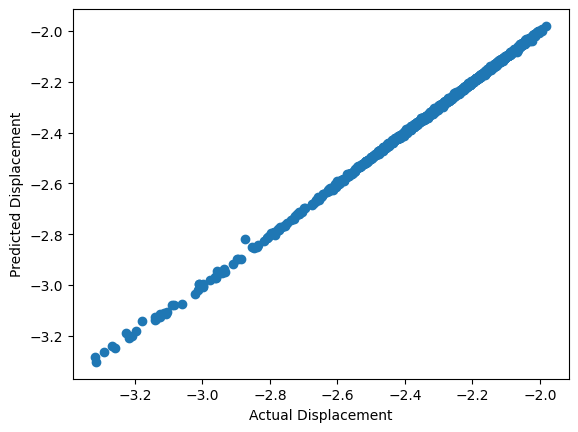

In [48]:
plt.scatter (yD_test, y_predPipeD)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predPipeD)
print(f'R-squared: {r2:.2f}')

In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
from sklearn.model_selection import GridSearchCV
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 'weights': ['uniform','distance'],'p':[1,2,5]}]

# Search for best hyperparameters
KNN = GridSearchCV(estimator=KNeighborsRegressor(), 
                      param_grid=hp_candidates, 
                      cv=5,
                      verbose=1,  
                      scoring='r2', 
                      return_train_score=True)
KNN.fit(XD_train, yD_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15],
                          'p': [1, 2, 5], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='r2', verbose=1)

In [51]:
y_predKNN = KNN.predict(XD_test) 

R-squared: 0.94


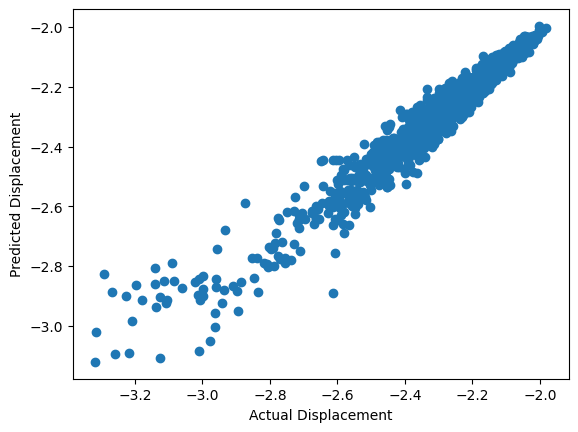

In [52]:
plt.scatter (yD_test, y_predKNN)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predKNN)
print(f'R-squared: {r2:.2f}')

In [53]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=30)
param_grid = { "n_estimators"      : [250, 300],
           "max_features"      : [3, 5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}
randF = GridSearchCV(estimator = model, param_grid=param_grid, n_jobs=-1, cv=5, scoring = 'r2')
randF.fit(XD_train, yD_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=30), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': [3, 5], 'min_samples_split': [2, 4],
                         'n_estimators': [250, 300]},
             scoring='r2')

In [54]:
randF.best_score_

0.9775507177190063

In [55]:
y_predrandF = randF.predict(XD_test) 

R-squared: 0.98


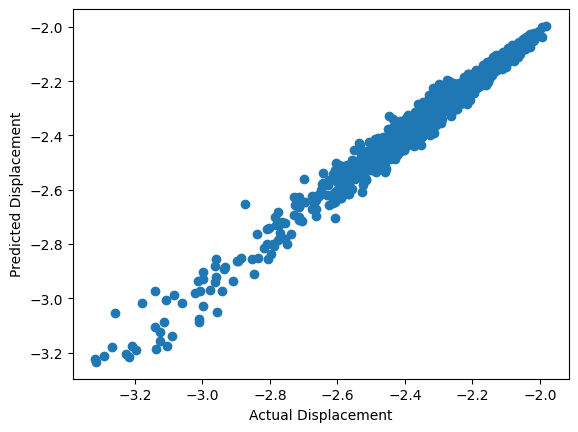

In [56]:
plt.scatter (yD_test, y_predrandF)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predrandF)
print(f'R-squared: {r2:.2f}')

In [57]:
from sklearn.neural_network import MLPRegressor

In [58]:
# Fitting a Regression model to the train data

param_list = {"hidden_layer_sizes": [1,50], "activation": ["identity", "logistic", "tanh", "relu"], "solver": ["lbfgs", "sgd", "adam"], "alpha": [0.00005,0.0005]}
MLP = GridSearchCV(
    estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
    param_grid=param_list,
    n_jobs=-1,
    cv=5,
    verbose=5,
    scoring ='r2')
MLP.fit(XD_train, yD_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
19 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
19 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ankur\OneDrive\Documents\To_PO\.venv\L

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000, n_iter_no_change=30),
             n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [1, 50],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='r2', verbose=5)

In [59]:
MLP.best_score_

0.9923646912014477

In [60]:
y_predMLP = MLP.predict(XD_test) 

R-squared: 0.99


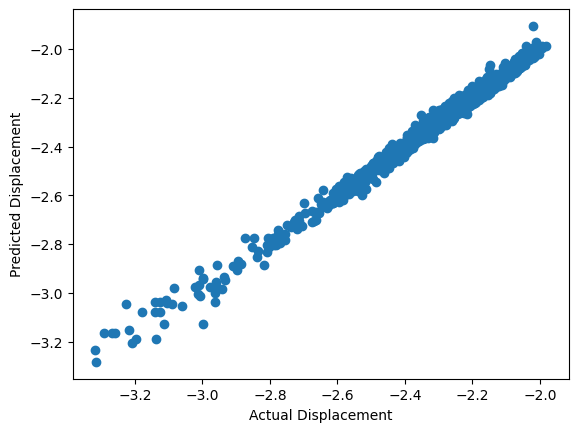

In [61]:
plt.scatter (yD_test, y_predMLP)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predMLP)
print(f'R-squared: {r2:.2f}')

In [62]:

## importing class from library
from sklearn.tree import DecisionTreeRegressor

## Setting optimum values for parameters.
param_grid = {
    'max_depth': [1, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## creating instance
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring = 'r2')

## fitting data 
# grid_search.fit(x, y)

grid_search.fit(XD_train, yD_train)

## getting best parameters 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [63]:
DTR = DecisionTreeRegressor(max_depth = 10, min_samples_split = 5, min_samples_leaf = 4)

In [64]:
DTR.fit(XD_train, yD_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5)

In [65]:
y_predDTR = DTR.predict(XD_test) 

R-squared: 0.94


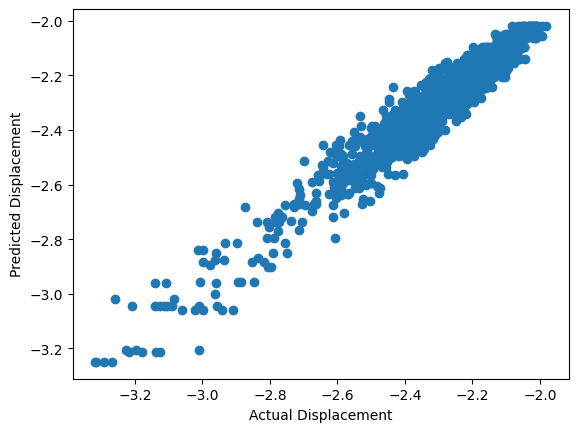

In [66]:
plt.scatter (yD_test, y_predDTR)
plt.xlabel("Actual Displacement")
plt.ylabel("Predicted Displacement")
r2 = r2_score(yD_test, y_predDTR)
print(f'R-squared: {r2:.2f}')

In [67]:
import autogluon as ag
from autogluon.tabular import TabularDataset, TabularPredictor

c:\Users\ankur\OneDrive\Documents\To_PO\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [68]:
ag_data = all_data.drop(columns=['Mass3', 'Stress4'])
ag_data

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4
0,19.91868,33.22566,40.69056,35.22798,16.94894,24.05912,31.23588,-2.126
1,22.88962,23.19807,44.83895,56.28082,12.26751,17.76598,29.86856,-2.730
2,55.95612,39.33677,42.01864,47.40645,10.56435,18.35673,17.14532,-2.425
3,26.00999,30.22451,44.61681,50.36019,12.88949,16.78163,30.71649,-2.486
4,28.13147,42.88168,31.00824,30.83574,11.02044,14.81101,32.82180,-2.325
...,...,...,...,...,...,...,...,...
5000,64.84000,38.63300,32.65500,40.40800,13.36300,14.92800,17.55100,-2.365
5001,49.04700,37.68800,49.81700,41.18000,10.43700,15.37500,20.17000,-2.449
5002,56.64500,52.97300,40.19400,30.47200,11.16100,11.77600,25.68400,-2.459
5003,36.84500,36.26600,42.68100,45.95900,10.23000,25.63500,20.09800,-2.322


In [69]:
ag_train, ag_test = train_test_split(ag_data, test_size=0.3, random_state=254)
ag_train

,cut 3,cut 2,cut 1,diamond,Cut2_to_Top,Cut2_to_Cut3,Cut1_to_Diamond,Displacement4
3405,19.99324,27.76485,35.22248,36.85703,14.01519,26.21694,15.61473,-2.077
2329,18.81625,31.56074,38.79395,60.02581,19.03227,15.81688,19.29132,-2.779
2071,20.14250,28.37549,26.71004,29.62164,10.56987,22.48519,30.00853,-2.125
894,31.84933,25.50630,32.42331,43.14149,15.58317,10.42389,26.82765,-2.209
2213,53.08311,49.69466,45.29877,30.63348,13.07843,16.80688,16.31809,-2.346
...,...,...,...,...,...,...,...,...
391,45.10930,27.79219,36.01724,29.06696,15.22054,21.82433,31.42851,-2.078
3775,26.83788,49.58353,49.65393,38.23782,11.01012,27.04446,22.02359,-2.387
582,47.43151,43.18588,39.43394,22.80548,11.43640,24.91258,16.89255,-2.188
2154,55.00216,34.08778,49.06923,37.64250,11.76093,20.18633,15.08831,-2.321


In [70]:
predictor_ag =  TabularPredictor(label='Displacement4').fit(ag_train, time_limit=7200, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels\ag-20240802_042136"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          22
Memory Avail:       7.73 GB / 31.61 GB (24.4%)
Disk Space Avail:   569.12 GB / 951.65 GB (59.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdou

[1000]	valid_set's rmse: 0.0236882
[2000]	valid_set's rmse: 0.0221429
[3000]	valid_set's rmse: 0.0216018
[4000]	valid_set's rmse: 0.0213791
[5000]	valid_set's rmse: 0.0213311
[6000]	valid_set's rmse: 0.0213032
[7000]	valid_set's rmse: 0.0212745
[8000]	valid_set's rmse: 0.0212622
[9000]	valid_set's rmse: 0.0212561
[10000]	valid_set's rmse: 0.0212528
[1000]	valid_set's rmse: 0.0195151
[2000]	valid_set's rmse: 0.0180883
[3000]	valid_set's rmse: 0.0176686
[4000]	valid_set's rmse: 0.0175497
[5000]	valid_set's rmse: 0.0174705
[6000]	valid_set's rmse: 0.017462
[7000]	valid_set's rmse: 0.0174241
[8000]	valid_set's rmse: 0.0174097
[9000]	valid_set's rmse: 0.0173924
[10000]	valid_set's rmse: 0.017385
[1000]	valid_set's rmse: 0.0165192
[2000]	valid_set's rmse: 0.0154396
[3000]	valid_set's rmse: 0.0151453
[4000]	valid_set's rmse: 0.0150635
[5000]	valid_set's rmse: 0.0149804
[6000]	valid_set's rmse: 0.014974
[7000]	valid_set's rmse: 0.0149558
[8000]	valid_set's rmse: 0.0149477
[9000]	valid_set's rm

	-0.017	 = Validation score   (-root_mean_squared_error)
	330.88s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 858.05s of the 1458.0s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.0235856
[1000]	valid_set's rmse: 0.0206286
[2000]	valid_set's rmse: 0.0204958
[3000]	valid_set's rmse: 0.0204403
[4000]	valid_set's rmse: 0.0204241
[5000]	valid_set's rmse: 0.0204263
[1000]	valid_set's rmse: 0.0188984
[1000]	valid_set's rmse: 0.022126
[1000]	valid_set's rmse: 0.0185518
[1000]	valid_set's rmse: 0.0183106
[2000]	valid_set's rmse: 0.0178736
[3000]	valid_set's rmse: 0.0177248
[4000]	valid_set's rmse: 0.0176567
[5000]	valid_set's rmse: 0.0176237
[6000]	valid_set's rmse: 0.0176057
[7000]	valid_set's rmse: 0.0175927
[8000]	valid_set's rmse: 0.0175854
[9000]	valid_set's rmse: 0.017582
[10000]	valid_set's rmse: 0.0175795
[1000]	valid_set's rmse: 0.0184154
[2000]	valid_set's rmse: 0.0182849
[1000]	valid_set's rmse: 0.0202468
[2000]	valid_set's rmse: 0.01997


	-0.02	 = Validation score   (-root_mean_squared_error)
	112.38s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 743.81s of the 1343.76s of remaining time.
	-0.032	 = Validation score   (-root_mean_squared_error)
	0.9s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 742.6s of the 1342.55s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.013	 = Validation score   (-root_mean_squared_error)
	560.59s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 181.7s of the 781.65s of remaining time.
	-0.0302	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 180.93s of the 780.88s of remaining time.
	Fitting 8 child model

[1000]	valid_set's rmse: 0.0107482
[1000]	valid_set's rmse: 0.0144828
[1000]	valid_set's rmse: 0.0110829
[2000]	valid_set's rmse: 0.0105137
[3000]	valid_set's rmse: 0.0103161
[4000]	valid_set's rmse: 0.0102347
[5000]	valid_set's rmse: 0.0101995
[6000]	valid_set's rmse: 0.0101912
[7000]	valid_set's rmse: 0.0101844
[8000]	valid_set's rmse: 0.0101793
[9000]	valid_set's rmse: 0.0101819
[10000]	valid_set's rmse: 0.0101828
[1000]	valid_set's rmse: 0.0174348
[2000]	valid_set's rmse: 0.016651
[3000]	valid_set's rmse: 0.0164442
[4000]	valid_set's rmse: 0.0163273
[5000]	valid_set's rmse: 0.0162633
[6000]	valid_set's rmse: 0.0162389
[7000]	valid_set's rmse: 0.0162184
[8000]	valid_set's rmse: 0.016211
[9000]	valid_set's rmse: 0.0162037
[10000]	valid_set's rmse: 0.016202
[1000]	valid_set's rmse: 0.0112229
[2000]	valid_set's rmse: 0.0108782
[3000]	valid_set's rmse: 0.0108244
[4000]	valid_set's rmse: 0.0108209
[5000]	valid_set's rmse: 0.0107926
[6000]	valid_set's rmse: 0.0107812
[7000]	valid_set's rm

	-0.0123	 = Validation score   (-root_mean_squared_error)
	155.71s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 441.11s of the 441.07s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.0145352
[2000]	valid_set's rmse: 0.014339
[3000]	valid_set's rmse: 0.0142264
[4000]	valid_set's rmse: 0.0141302
[5000]	valid_set's rmse: 0.0140712
[6000]	valid_set's rmse: 0.0140414
[7000]	valid_set's rmse: 0.0140327
[8000]	valid_set's rmse: 0.0140326
[9000]	valid_set's rmse: 0.014034


	-0.0119	 = Validation score   (-root_mean_squared_error)
	54.06s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 386.33s of the 386.29s of remaining time.
	-0.0109	 = Validation score   (-root_mean_squared_error)
	1.51s	 = Training   runtime
	0.18s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 384.52s of the 384.49s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6623.
	Ran out of time, early stopping on iteration 6989.
	Ran out of time, early stopping on iteration 7032.
	Ran out of time, early stopping on iteration 7394.
	Ran out of time, early stopping on iteration 7391.
	Ran out of time, early stopping on iteration 8346.
	Ran out of time, early stopping on iteration 9666.
	-0.011	 = Validation score   (-root_mean_squared_error)
	367.89s	 = Training   runtime
	0.07s	 = Valida

[1000]	valid_set's rmse: 0.0178608
[2000]	valid_set's rmse: 0.0164834
[3000]	valid_set's rmse: 0.0159799
[4000]	valid_set's rmse: 0.0157646
[5000]	valid_set's rmse: 0.0156874
[6000]	valid_set's rmse: 0.0156238
[7000]	valid_set's rmse: 0.0155792
[8000]	valid_set's rmse: 0.0155533
[9000]	valid_set's rmse: 0.0155391
[10000]	valid_set's rmse: 0.0155332
[1000]	valid_set's rmse: 0.0214173
[2000]	valid_set's rmse: 0.0200861
[3000]	valid_set's rmse: 0.0195522
[4000]	valid_set's rmse: 0.0193973
[5000]	valid_set's rmse: 0.0193094
[6000]	valid_set's rmse: 0.019297
[7000]	valid_set's rmse: 0.0192763
[8000]	valid_set's rmse: 0.0192637
[9000]	valid_set's rmse: 0.0192489
[10000]	valid_set's rmse: 0.019241
[1000]	valid_set's rmse: 0.0168136
[2000]	valid_set's rmse: 0.0156956
[3000]	valid_set's rmse: 0.0153878
[4000]	valid_set's rmse: 0.0152645
[5000]	valid_set's rmse: 0.0151816
[6000]	valid_set's rmse: 0.0151412
[7000]	valid_set's rmse: 0.0151167
[8000]	valid_set's rmse: 0.0151041
[9000]	valid_set's r

	-0.0171	 = Validation score   (-root_mean_squared_error)
	303.36s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 3285.88s of the 5085.04s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.0187394
[1000]	valid_set's rmse: 0.0177189
[1000]	valid_set's rmse: 0.0183411
[2000]	valid_set's rmse: 0.0179664
[1000]	valid_set's rmse: 0.0161827
[2000]	valid_set's rmse: 0.0159876
[3000]	valid_set's rmse: 0.0159395
[4000]	valid_set's rmse: 0.0159061
[5000]	valid_set's rmse: 0.0158922
[6000]	valid_set's rmse: 0.0158867
[7000]	valid_set's rmse: 0.0158817
[8000]	valid_set's rmse: 0.0158801
[9000]	valid_set's rmse: 0.0158811
[10000]	valid_set's rmse: 0.0158822
[1000]	valid_set's rmse: 0.0165863
[2000]	valid_set's rmse: 0.0165047
[3000]	valid_set's rmse: 0.0164639
[4000]	valid_set's rmse: 0.0164586
[5000]	valid_set's rmse: 0.0164513
[1000]	valid_set's rmse: 0.022923
[2000]	valid_set's rmse: 0.0226938
[3000]	valid_set's rmse: 0.0226305
[4000]	valid_set's rmse: 0.0226338
[1000]	valid_set's rmse: 0.0173081
[2000]	valid_set's rmse: 0.0170386
[3000]	valid_set's rmse: 0.0169887
[4000]	valid_set's rmse: 0.0169793
[5000]	valid_set's rmse: 0.016982


	-0.0188	 = Validation score   (-root_mean_squared_error)
	126.6s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 3157.18s of the 4956.34s of remaining time.
	-0.031	 = Validation score   (-root_mean_squared_error)
	0.93s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 3155.97s of the 4955.13s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0134	 = Validation score   (-root_mean_squared_error)
	563.0s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 2592.67s of the 4391.83s of remaining time.
	-0.0298	 = Validation score   (-root_mean_squared_error)
	0.51s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 2591.89s of the 4391.05s of remaining time.
	Fitting 8 c

[1000]	valid_set's rmse: 0.0255505
[2000]	valid_set's rmse: 0.0255449
[3000]	valid_set's rmse: 0.0255449
[4000]	valid_set's rmse: 0.0255449
[5000]	valid_set's rmse: 0.0255449
[6000]	valid_set's rmse: 0.0255449
[1000]	valid_set's rmse: 0.025846
[2000]	valid_set's rmse: 0.0258389
[3000]	valid_set's rmse: 0.0258389
[1000]	valid_set's rmse: 0.0251852
[2000]	valid_set's rmse: 0.0251836
[1000]	valid_set's rmse: 0.0293056
[2000]	valid_set's rmse: 0.0292999
[3000]	valid_set's rmse: 0.0292998
[4000]	valid_set's rmse: 0.0292998
[5000]	valid_set's rmse: 0.0292998
[6000]	valid_set's rmse: 0.0292998
[1000]	valid_set's rmse: 0.0238809
[2000]	valid_set's rmse: 0.0238768
[3000]	valid_set's rmse: 0.0238766
[4000]	valid_set's rmse: 0.0238766
[5000]	valid_set's rmse: 0.0238766
[6000]	valid_set's rmse: 0.0238766
[7000]	valid_set's rmse: 0.0238766
[8000]	valid_set's rmse: 0.0238766
[9000]	valid_set's rmse: 0.0238766
[10000]	valid_set's rmse: 0.0238766
[1000]	valid_set's rmse: 0.0266715
[2000]	valid_set's r

	-0.0271	 = Validation score   (-root_mean_squared_error)
	215.53s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L1 ... Training model for up to 2110.29s of the 3909.46s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0137	 = Validation score   (-root_mean_squared_error)
	556.78s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L1 ... Training model for up to 1553.2s of the 3352.36s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0176	 = Validation score   (-root_mean_squared_error)
	260.75s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L1 ... Training model for up to 1292.37s of the 3091.53s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.0218583
[2000]	valid_set's rmse: 0.0207806
[3000]	valid_set's rmse: 0.0204798
[4000]	valid_set's rmse: 0.0203423
[5000]	valid_set's rmse: 0.0202842
[6000]	valid_set's rmse: 0.0202602
[7000]	valid_set's rmse: 0.0202495
[8000]	valid_set's rmse: 0.0202463
[9000]	valid_set's rmse: 0.0202445
[10000]	valid_set's rmse: 0.0202417
[1000]	valid_set's rmse: 0.0221674
[2000]	valid_set's rmse: 0.021673
[3000]	valid_set's rmse: 0.0215966
[4000]	valid_set's rmse: 0.02161
[1000]	valid_set's rmse: 0.0207369
[2000]	valid_set's rmse: 0.0200892
[3000]	valid_set's rmse: 0.0198519
[4000]	valid_set's rmse: 0.0197589
[5000]	valid_set's rmse: 0.0197219
[6000]	valid_set's rmse: 0.0196998
[7000]	valid_set's rmse: 0.0197038
[1000]	valid_set's rmse: 0.0278125
[2000]	valid_set's rmse: 0.0272356
[3000]	valid_set's rmse: 0.0270439
[4000]	valid_set's rmse: 0.0270177
[5000]	valid_set's rmse: 0.0270055
[1000]	valid_set's rmse: 0.0202569
[2000]	valid_set's rmse: 0.0191621
[3000]	valid_set's rms

	-0.0223	 = Validation score   (-root_mean_squared_error)
	265.81s	 = Training   runtime
	0.56s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 1021.13s of the 2820.3s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0134	 = Validation score   (-root_mean_squared_error)
	52.95s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 967.97s of the 2767.14s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6740.
	Ran out of time, early stopping on iteration 6869.
	Ran out of time, early stopping on iteration 6870.
	Ran out of time, early stopping on iteration 7611.
	Ran out of time, early stopping on iteration 8305.
	Ran out of time, early stopping on iteration 8383.
	Ran out of time, early stopping on iteration 9890.
	-0.

[1000]	valid_set's rmse: 0.0365156


	Ran out of time, early stopping on iteration 1122. Best iteration is:
	[1122]	valid_set's rmse: 0.0339502


[1000]	valid_set's rmse: 0.0366697


	Ran out of time, early stopping on iteration 1192. Best iteration is:
	[1192]	valid_set's rmse: 0.0338078


[1000]	valid_set's rmse: 0.0366938


	Ran out of time, early stopping on iteration 1172. Best iteration is:
	[1172]	valid_set's rmse: 0.0345022


[1000]	valid_set's rmse: 0.0506985


	Ran out of time, early stopping on iteration 1162. Best iteration is:
	[1160]	valid_set's rmse: 0.0480128


[1000]	valid_set's rmse: 0.0284008


	Ran out of time, early stopping on iteration 1312. Best iteration is:
	[1311]	valid_set's rmse: 0.0246401


[1000]	valid_set's rmse: 0.0377


	Ran out of time, early stopping on iteration 1392. Best iteration is:
	[1392]	valid_set's rmse: 0.0317705


[1000]	valid_set's rmse: 0.0418699


	Ran out of time, early stopping on iteration 1632. Best iteration is:
	[1632]	valid_set's rmse: 0.0355789


[1000]	valid_set's rmse: 0.0339125


	Ran out of time, early stopping on iteration 1742. Best iteration is:
	[1742]	valid_set's rmse: 0.0258346
	-0.0342	 = Validation score   (-root_mean_squared_error)
	36.67s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 1.17s of the 1800.33s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Not enough time to train first epoch. (Time Required: 0.41s, Time Left: 0.11s)
	Time limit exceeded... Skipping NeuralNetTorch_r22_BAG_L1.
Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 0.8s of the 1799.96s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Time limit exceeded... Skipping XGBoost_r33_BAG_L1.
Fitting model: ExtraTrees_r42_BAG_L1 ... Training model for up to 0.48s of the 1799.65s of remaining time.
	-0.0299	 = Validation score   (-root_mean_squared_error)
	0.59s	 = Training   runtime

[1000]	valid_set's rmse: 0.0184107
[1000]	valid_set's rmse: 0.0147617
[1000]	valid_set's rmse: 0.0117531
[1000]	valid_set's rmse: 0.00878812
[2000]	valid_set's rmse: 0.00870255
[3000]	valid_set's rmse: 0.00870319


	-0.013	 = Validation score   (-root_mean_squared_error)
	39.91s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 1758.22s of the 1758.18s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 0.0136649
[2000]	valid_set's rmse: 0.0133495
[3000]	valid_set's rmse: 0.0133144


	-0.0106	 = Validation score   (-root_mean_squared_error)
	28.81s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 1729.11s of the 1729.06s of remaining time.
	-0.0089	 = Validation score   (-root_mean_squared_error)
	1.89s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 1726.93s of the 1726.89s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0098	 = Validation score   (-root_mean_squared_error)
	635.49s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L2 ... Training model for up to 1091.06s of the 1091.02s of remaining time.
	-0.0086	 = Validation score   (-root_mean_squared_error)
	0.63s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 1090.18s of the 1090.12s of remaining time.
	Fitting 8

[1000]	valid_set's rmse: 0.0104543
[2000]	valid_set's rmse: 0.0104481
[3000]	valid_set's rmse: 0.0104471
[4000]	valid_set's rmse: 0.010447
[5000]	valid_set's rmse: 0.010447
[6000]	valid_set's rmse: 0.010447
[7000]	valid_set's rmse: 0.010447
[8000]	valid_set's rmse: 0.010447
[9000]	valid_set's rmse: 0.010447
[10000]	valid_set's rmse: 0.010447
[1000]	valid_set's rmse: 0.00826051


	-0.0099	 = Validation score   (-root_mean_squared_error)
	96.38s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: CatBoost_r177_BAG_L2 ... Training model for up to 838.9s of the 838.86s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-0.0098	 = Validation score   (-root_mean_squared_error)
	578.96s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetTorch_r79_BAG_L2 ... Training model for up to 259.67s of the 259.63s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 88)
	-0.0156	 = Validation score   (-root_mean_squared_error)
	159.03s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: LightGBM_r131_BAG_L2 ... Training model for up to 100.42s of the 100.38s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingS

[1000]	valid_set's rmse: 0.0151925
[2000]	valid_set's rmse: 0.0146581


	Ran out of time, early stopping on iteration 2368. Best iteration is:
	[2297]	valid_set's rmse: 0.0145966


[1000]	valid_set's rmse: 0.0106506


	-0.011	 = Validation score   (-root_mean_squared_error)
	42.1s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI_r191_BAG_L2 ... Training model for up to 57.7s of the 57.67s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 35)
	Ran out of time, stopping training early. (Stopping on epoch 36)
	Ran out of time, stopping training early. (Stopping on epoch 38)
	Ran out of time, stopping training early. (Stopping on epoch 40)
No improvement since epoch 6: early stopping
No improvement since epoch 13: early stopping
No improvement since epoch 9: early stopping
	-0.014	 = Validation score   (-root_mean_squared_error)
	45.41s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost_r9_BAG_L2 ... Training model for up to 12.0s of the 11.96s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalF

In [71]:
ag_pred = predictor_ag.predict(ag_test.drop(columns=['Displacement4']))

In [72]:
predictor_ag.evaluate(ag_test, silent=True)

{'root_mean_squared_error': -0.006631556435004828,
 'mean_squared_error': -4.397754075065395e-05,
 'mean_absolute_error': -0.0040900926558219,
 'r2': 0.9990118306343242,
 'pearsonr': 0.9995093981333981,
 'median_absolute_error': -0.0025865840911865057}